In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
from itertools import cycle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
maindf = pd.read_csv('/content/Bitstamp_BTCUSD_1h (1).csv')

In [ ]:
maindf.shape

(42955, 6)

In [ ]:
maindf.head()

,date,open,high,low,close,Volume USD
0,09-04-2023 00:00,27968.0,27973.0,27961.0,27962.0,35910.68923
1,08-04-2023 23:00,27967.0,28018.0,27961.0,27969.0,125531.74650
2,08-04-2023 22:00,27952.0,27980.0,27910.0,27979.0,825916.32950
3,08-04-2023 21:00,27947.0,27958.0,27929.0,27952.0,76354.55530
4,08-04-2023 20:00,27947.0,27988.0,27945.0,27948.0,96833.04736


In [ ]:
maindf.isnull().sum()


date          0
open          0
high          0
low           0
close         0
Volume USD    0
dtype: int64

In [ ]:
maindf.tail()

,date,open,high,low,close,Volume USD
42950,15-05-2018 10:00,8708.32,8865.00,8695.11,8795.90,1260.69
42951,15-05-2018 09:00,8728.49,8754.40,8701.35,8708.32,182.62
42952,15-05-2018 08:00,8739.00,8750.27,8660.53,8728.49,917.79
42953,15-05-2018 07:00,8740.99,8766.00,8721.11,8739.00,273.58
42954,15-05-2018 06:00,8733.86,8796.68,8707.28,8740.99,559.93


In [ ]:
maindf.describe()

,open,high,low,close,Volume USD
count,42955.000000,42955.000000,42955.000000,42955.000000,4.295500e+04
mean,21259.159423,21370.105748,21140.131360,21259.705523,2.822112e+06
std,16910.410781,17007.128070,16805.725164,16910.493003,6.645189e+06
min,3139.760000,3158.340000,3122.280000,3139.760000,0.000000e+00
25%,7744.850000,7779.330000,7702.360000,7744.850000,2.257900e+02
50%,13100.000000,13152.900000,13053.610000,13099.660000,3.921452e+05
75%,34216.805000,34465.055000,33874.365000,34219.740000,2.960342e+06
max,68635.050000,69000.000000,68447.000000,68627.010000,2.582324e+08


In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42955 entries, 0 to 42954
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        42955 non-null  object 
 1   open        42955 non-null  float64
 2   high        42955 non-null  float64
 3   low         42955 non-null  float64
 4   close       42955 non-null  float64
 5   Volume USD  42955 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.0+ MB


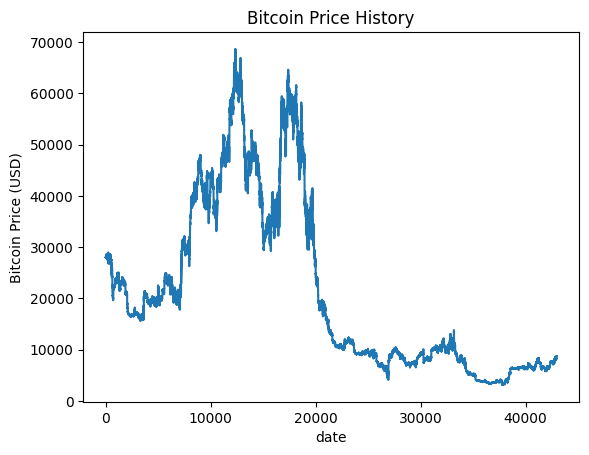

In [ ]:
plt.plot(maindf.index, maindf['open'])
plt.xlabel('date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Price History')
plt.show()

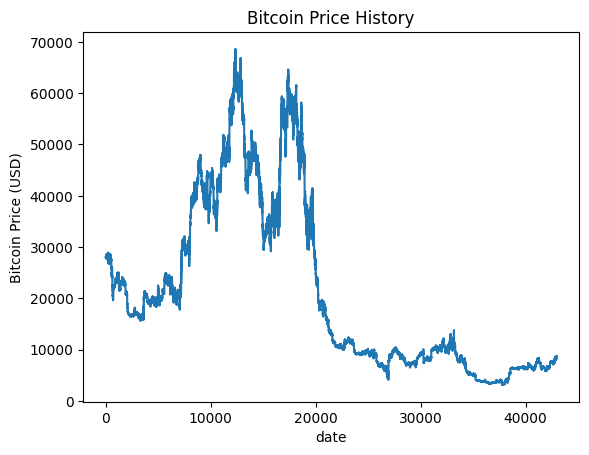

In [ ]:
plt.plot(maindf.index, maindf['close'])
plt.xlabel('date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Price History')
plt.show()

In [ ]:
sd=maindf.iloc[-1][0]
ed=maindf.iloc[0][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 15-05-2018 06:00
Ending Date 09-04-2023 00:00


Analysis for 2021

In [ ]:
maindf['date'] = pd.to_datetime(maindf['date'], format='%Y-%m-%d %H:%M')

y_2021 = maindf.loc[(maindf['date'] >= '2021-01-01 00:00')
                     & (maindf['date'] < '2021-12-31 23:00')]

y_2021.drop(y_2021[['open','Volume USD']],axis=1)

,date,high,low,close
11114,2021-12-31 22:00:00,46560.81,46254.81,46322.70
11115,2021-12-31 21:00:00,46516.01,45774.79,46329.19
11116,2021-12-31 20:00:00,46208.92,45655.31,45876.39
11117,2021-12-31 19:00:00,46674.91,45666.00,45703.05
11118,2021-12-31 18:00:00,47024.50,46494.35,46648.83
...,...,...,...,...
19868,2021-01-01 04:00:00,29458.27,29121.80,29290.38
19869,2021-01-01 03:00:00,29414.48,29216.61,29345.63
19870,2021-01-01 02:00:00,29535.95,29189.34,29249.33
19871,2021-01-01 01:00:00,29543.93,29010.36,29479.12


In [ ]:
y_2021.groupby(y_2021['date'].dt.strftime('%B'))['low'].min()
monthvise_high = y_2021.groupby(maindf['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.date, y=[y_2021['open'], y_2021['close'], 
                                          y_2021['high'], y_2021['low']],
             labels={'date': 'date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Normalization

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
maindf.head()

,date,open,high,low,close,Volume USD
0,2023-04-09 00:00:00,27968.0,27973.0,27961.0,27962.0,35910.68923
1,2023-04-08 23:00:00,27967.0,28018.0,27961.0,27969.0,125531.74650
2,2023-04-08 22:00:00,27952.0,27980.0,27910.0,27979.0,825916.32950
3,2023-04-08 21:00:00,27947.0,27958.0,27929.0,27952.0,76354.55530
4,2023-04-08 20:00:00,27947.0,27988.0,27945.0,27948.0,96833.04736


In [ ]:
maindf= maindf.drop(['date'],axis=1)
maindf= maindf.drop(['high'],axis=1)
maindf= maindf.drop(['low'],axis=1)
maindf= maindf.drop(['close'],axis=1)

In [ ]:
maindf.head()

,open,Volume USD
0,27968.0,35910.68923
1,27967.0,125531.74650
2,27952.0,825916.32950
3,27947.0,76354.55530
4,27947.0,96833.04736


In [ ]:
# Preprocess the data
# Normalize the price and volume values
scaler = MinMaxScaler()
maindf[['open', 'Volume USD ']] = scaler.fit_transform(maindf[['open', 'Volume USD']])
# Split the data into training and test sets
train_size = int(len(maindf) * 0.8)
train_data = maindf[:train_size]
test_data = maindf[train_size:]

In [ ]:
# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(5, 2)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the LSTM model
X_train, y_train = [], []
for i in range(5, train_size):
    X_train.append(train_data.iloc[i-5:i, [0, 1]].values)
    y_train.append(train_data.iloc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1073/1073 [==============================] - 12s 7ms/step - loss: 0.0415
Epoch 2/100
1073/1073 [==============================] - 7s 7ms/step - loss: 0.0311
Epoch 3/100
1073/1073 [==============================] - 8s 7ms/step - loss: 0.0310
Epoch 4/100
1073/1073 [==============================] - 8s 8ms/step - loss: 0.0310
Epoch 5/100
1073/1073 [==============================] - 8s 7ms/step - loss: 0.0339
Epoch 6/100
1073/1073 [==============================] - 8s 7ms/step - loss: 0.0321
Epoch 7/100
1073/1073 [==============================] - 8s 7ms/step - loss: 0.0314
Epoch 8/100
1073/1073 [==============================] - 8s 7ms/step - loss: 0.0312
Epoch 9/100
1073/1073 [==============================] - 8s 8ms/step - loss: 0.0310
Epoch 10/100
1073/1073 [==============================] - 8s 8ms/step - loss: 0.0308
Epoch 11/100
1073/1073 [==============================] - 8s 7ms/step - loss: 0.0308
Epoch 12/100
1073/1073 [==============================] - 8s 8ms/step - l

In [ ]:
# Evaluate the model
X_test, y_test = [], []
for i in range(5, len(test_data)):
    X_test.append(test_data.iloc[i-5:i, [0, 1]].values)
    y_test.append(test_data.iloc[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print('Mean Squared Error:', mse)

268/268 [==============================] - 1s 2ms/step
Mean Squared Error: 0.025995889618829423
